# Name : Mann Dsylva
# Rollno : 24MAI009

# **Transfer Learning**

A problem in ML that focuses on storing knowledge gained while solving one problem and applying it on different but similar(related) problem.


Eg. I want to train a model to identify dog and cat from images. I can use pre trained models like VGG16.

But let say the VGG16 model is not trained on classification of mobile phone and tablets than transfer learning cannot be used there.

**Benefits of using TL :**
Reduced training time,improved performance on small datasets,avoid overfitting,better use of resources.

Transfer learning is particularly powerful when computational resources or data are limited, making it a widely adopted technique in AI and deep learning applications.



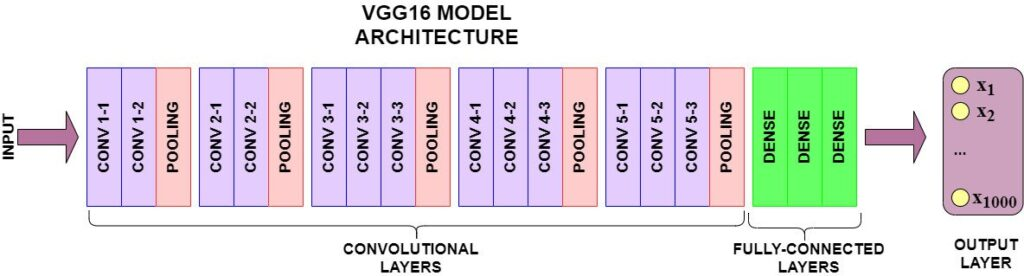

In TL we have to train the dense layers only.

In [3]:
import kagglehub
import os
path = kagglehub.dataset_download("toaharahmanratul/lag-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/toaharahmanratul/lag-dataset/versions/1


In [4]:
dataset_path = path
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['LAG']


In [5]:
train_glaucoma_image = os.path.join(dataset_path, 'LAG/train/glaucoma/image')
train_glaucoma_att_image=os.path.join(dataset_path, 'LAG/train/glaucoma/attention_map')
train_non_glaucoma_image = os.path.join(dataset_path, 'LAG/train/non_glaucoma/image')
train_non_glaucoma_att_image=os.path.join(dataset_path, 'LAG/train/non_glaucoma/attention_map')

test_glaucoma_image = os.path.join(dataset_path, 'LAG/test/glaucoma/image')
test_glaucoma_att_image=os.path.join(dataset_path, 'LAG/test/glaucoma/attention_map')
test_non_glaucoma_image = os.path.join(dataset_path, 'LAG/test/non_glaucoma/image')
test_non_glaucoma_att_image = os.path.join(dataset_path, 'LAG/test/non_glaucoma/attention_map')

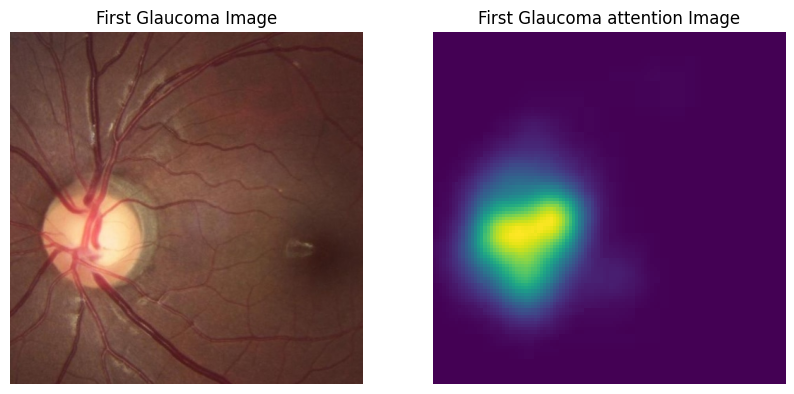

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

glaucoma_images = os.listdir(train_glaucoma_image)
first_glaucoma_image = glaucoma_images[0]
glaucoma_image_path = os.path.join(train_glaucoma_image, first_glaucoma_image)

glaucoma_att_images = os.listdir(train_glaucoma_att_image)
first_glaucoma_att_image = glaucoma_att_images[0]
glaucoma_att_image_path = os.path.join(train_glaucoma_att_image, first_glaucoma_att_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
img_glaucoma = mpimg.imread(glaucoma_image_path)
plt.imshow(img_glaucoma)
plt.title('First Glaucoma Image')
plt.axis('off')

plt.subplot(1, 2, 2)
img_glaucoma = mpimg.imread(glaucoma_att_image_path)
plt.imshow(img_glaucoma)
plt.title('First Glaucoma attention Image')
plt.axis('off')
plt.show()

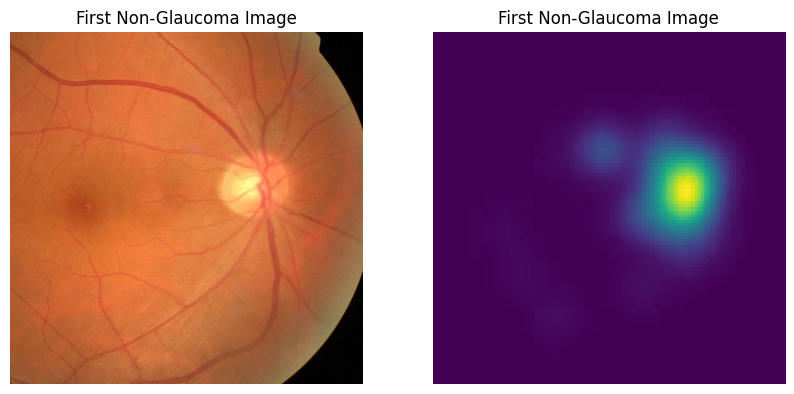

In [7]:
non_glaucoma_images = os.listdir(train_non_glaucoma_image)
first_non_glaucoma_image = non_glaucoma_images[0]
non_glaucoma_image_path = os.path.join(train_non_glaucoma_image, first_non_glaucoma_image)

non_glaucoma_att_images = os.listdir(train_non_glaucoma_att_image)
first_non_glaucoma_att_image = non_glaucoma_att_images[0]
non_glaucoma_att_image_path = os.path.join(train_non_glaucoma_att_image, first_non_glaucoma_att_image)

plt.figure(figsize=(10, 5))
# Show the Non-Glaucoma image
plt.subplot(1, 2, 1)
img_non_glaucoma = mpimg.imread(non_glaucoma_image_path)
plt.imshow(img_non_glaucoma)
plt.title('First Non-Glaucoma Image')
plt.axis('off')

plt.subplot(1, 2, 2)
img_non_glaucoma = mpimg.imread(non_glaucoma_att_image_path)
plt.imshow(img_non_glaucoma)
plt.title('First Non-Glaucoma Image')
plt.axis('off')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import (
    VGG16, VGG19, ResNet50, ResNet101, ResNet152, InceptionV3)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = os.path.join(dataset_path, 'LAG/train')

image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Flow from directory for training images from both glaucoma and non-glaucoma
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  )

# Flow from directory for validation images from both glaucoma and non-glaucoma
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation' )

Found 6215 images belonging to 2 classes.
Found 1553 images belonging to 2 classes.


In [10]:
def create_model(base_model, lr=0.001):
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [12]:
# Create VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16_model = create_model(vgg16)
history_vgg16 = vgg16_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

vgg16_training_accuracy = history_vgg16.history['accuracy'][-1]
vgg16_val_accuracy = max(history_vgg16.history['val_accuracy'])

print(f"VGG16: Training Accuracy: {vgg16_training_accuracy * 100:.2f}%, Validation Accuracy: {vgg16_val_accuracy * 100:.2f}%")

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 686ms/step - accuracy: 0.6516 - loss: 1.2300 - val_accuracy: 0.6845 - val_loss: 0.6501
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 97s 493ms/step - accuracy: 0.6831 - loss: 0.6392 - val_accuracy: 0.6845 - val_loss: 0.6238
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 101s 513ms/step - accuracy: 0.6778 - loss: 0.6301 - val_accuracy: 0.6845 - val_loss: 0.6258
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 490ms/step - accuracy: 0.6787 - loss: 0.6295 - val_accuracy: 0.6845 - val_loss: 0.6236
VGG16: Training Accuracy: 68.43%, Validation Accuracy: 68.45%


In [13]:
#googlenet
googlenet = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
googlenet_model = create_model(googlenet)

history_googlenet = googlenet_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

googlenet_training_accuracy = history_googlenet.history['accuracy'][-1]
googlenet_val_accuracy = max(history_googlenet.history['val_accuracy'])

print(f"GoogleNet: Training Accuracy: {googlenet_training_accuracy * 100:.2f}%, Validation Accuracy: {googlenet_val_accuracy * 100:.2f}%")

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 178s 488ms/step - accuracy: 0.7341 - loss: 0.5555 - val_accuracy: 0.4127 - val_loss: 0.7396
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 47s 236ms/step - accuracy: 0.8236 - loss: 0.3877 - val_accuracy: 0.6220 - val_loss: 0.6860
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 84s 248ms/step - accuracy: 0.8434 - loss: 0.3400 - val_accuracy: 0.7090 - val_loss: 0.5863
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 80s 237ms/step - accuracy: 0.8582 - loss: 0.3061 - val_accuracy: 0.6961 - val_loss: 0.5898
GoogleNet: Training Accuracy: 84.96%, Validation Accuracy: 70.90%


In [14]:
# ResNet50
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_model = create_model(resnet50)

history_resnet50 = resnet50_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

resnet50_training_accuracy = history_resnet50.history['accuracy'][-1]
resnet50_val_accuracy = max(history_resnet50.history['val_accuracy'])

print(f"ResNet50: Training Accuracy: {resnet50_training_accuracy * 100:.2f}%, Validation Accuracy: {resnet50_val_accuracy * 100:.2f}%")

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 155s 475ms/step - accuracy: 0.6833 - loss: 0.7355 - val_accuracy: 0.3155 - val_loss: 4.6997
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 78s 305ms/step - accuracy: 0.7825 - loss: 0.4661 - val_accuracy: 0.3155 - val_loss: 0.9022
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 307ms/step - accuracy: 0.8094 - loss: 0.3995 - val_accuracy: 0.3155 - val_loss: 0.7483
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 60s 304ms/step - accuracy: 0.8117 - loss: 0.3996 - val_accuracy: 0.3921 - val_loss: 0.6887
ResNet50: Training Accuracy: 81.16%, Validation Accuracy: 39.21%


In [15]:
# ResNet101

resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet101_model = create_model(resnet101)

history_resnet101 = resnet101_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

resnet101_training_accuracy = history_resnet101.history['accuracy'][-1]
resnet101_val_accuracy = max(history_resnet101.history['val_accuracy'])

print(f"ResNet101: Training Accuracy: {resnet101_training_accuracy * 100:.2f}%, Validation Accuracy: {resnet101_val_accuracy * 100:.2f}%")

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 272s 845ms/step - accuracy: 0.7271 - loss: 0.6441 - val_accuracy: 0.3155 - val_loss: 0.7292
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 152s 506ms/step - accuracy: 0.7735 - loss: 0.4655 - val_accuracy: 0.3155 - val_loss: 1.2795
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 143s 510ms/step - accuracy: 0.8011 - loss: 0.4293 - val_accuracy: 0.3155 - val_loss: 0.7937
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 106s 542ms/step - accuracy: 0.8102 - loss: 0.4008 - val_accuracy: 0.3155 - val_loss: 0.7218
ResNet101: Training Accuracy: 80.98%, Validation Accuracy: 31.55%


In [16]:
# ResNet152 fggfgfdertrefd
resnet152 = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet152_model = create_model(resnet152)

history_resnet152 = resnet152_model.fit(train_generator, epochs=4, validation_data=validation_generator, verbose=1)

resnet152_training_accuracy = history_resnet152.history['accuracy'][-1]
resnet152_val_accuracy = max(history_resnet152.history['val_accuracy'])

print(f"ResNet152: Training Accuracy: {resnet152_training_accuracy * 100:.2f}%, Validation Accuracy: {resnet152_val_accuracy * 100:.2f}%")

Epoch 1/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.6675 - loss: 0.7782 - val_accuracy: 0.6845 - val_loss: 0.6858
Epoch 2/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.6854 - loss: 0.5259 - val_accuracy: 0.3155 - val_loss: 0.6957
Epoch 3/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 149s 761ms/step - accuracy: 0.7571 - loss: 0.5224 - val_accuracy: 0.3155 - val_loss: 0.7067
Epoch 4/4
195/195 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.7694 - loss: 0.4807 - val_accuracy: 0.3155 - val_loss: 0.7493
ResNet152: Training Accuracy: 77.73%, Validation Accuracy: 68.45%


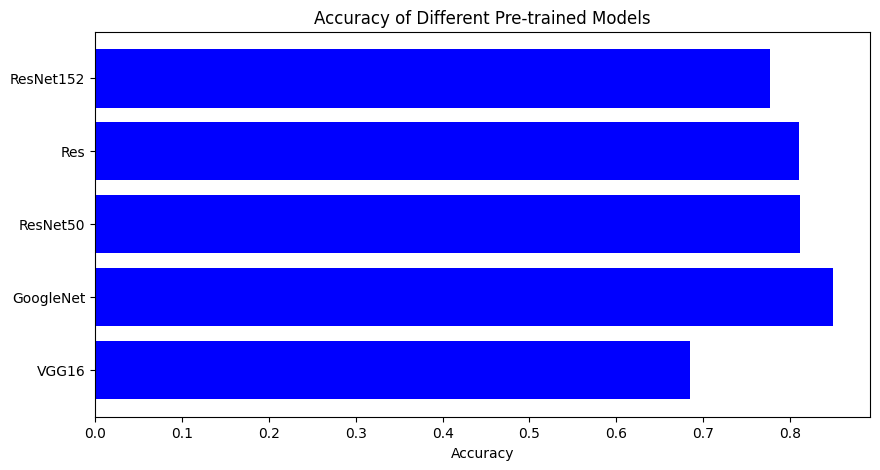

In [22]:
accuracy_dict = {
    'VGG16': vgg16_training_accuracy,
    'GoogleNet': googlenet_training_accuracy,
    'ResNet50': resnet50_training_accuracy,
    'Res': resnet101_training_accuracy,
    'ResNet152': resnet152_training_accuracy
}
names = list(accuracy_dict.keys())
accuracies = list(accuracy_dict.values())

plt.figure(figsize=(10, 5))
plt.barh(names, accuracies, color='blue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Pre-trained Models')
plt.show()